In [3]:
import yfinance as yf
import pandas as pd

# Fetch historical cdata for SENSEX
sensex = yf.download('^BSESN', start='2010-01-01', end='2024-06-01')
sensex.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200


In [5]:
import requests
import zipfile
from io import BytesIO

# Load the data into a dataframe
news_df = pd.read_csv('C:/Users/LENOVO/Downloads/india-news-headlines.csv')
news_df.head()


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
# Convert 'publish_date' to datetime format
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')

# Check the updated dataframe
print(news_df.head())

# Aggregate headlines by date and concatenate them into a single string
news_aggregated = news_df.groupby('publish_date')['headline_text'].apply(lambda x: ' '.join(x)).reset_index()

# Display the aggregated news dataframe
print(news_aggregated.head())


  publish_date headline_category  \
0   2001-01-02           unknown   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic  
  publish_date                                      headline_text
0   2001-01-02  Status quo will not be disturbed at Ayodhya; s...
1   2001-01-03  Powerless north India gropes in the dark Think...
2   2001-01-04  The string that pulled Stephen Hawking to Indi...
3   2001-01-05  Light combat craft takes India into club class...
4   2001-01-06  Light combat craft takes India into club class...


Perform Sentiment Analysis with TextBlob

In [10]:
news_aggregated.shape

(7717, 2)

In [12]:
from textblob import TextBlob

# Function to compute sentiment scores using TextBlob
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Reduce the size of the news data for quicker processing by taking only the first 1000 rows for testing
news_sample = news_aggregated.head(7000)

# Apply the function to compute sentiment for the sample
news_sample['Sentiment'] = news_sample['headline_text'].apply(get_textblob_sentiment)

# Display the sample dataframe with sentiment scores
print(news_sample.head())


  publish_date                                      headline_text  Sentiment
0   2001-01-02  Status quo will not be disturbed at Ayodhya; s...   0.151333
1   2001-01-03  Powerless north India gropes in the dark Think...   0.088462
2   2001-01-04  The string that pulled Stephen Hawking to Indi...   0.087961
3   2001-01-05  Light combat craft takes India into club class...   0.262024
4   2001-01-06  Light combat craft takes India into club class...   0.248485


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18664\4183234402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_sample['Sentiment'] = news_sample['headline_text'].apply(get_textblob_sentiment)


In [13]:
# Ensure SENSEX DataFrame has a date column for merging
sensex.reset_index(inplace=True)
sensex['Date'] = pd.to_datetime(sensex['Date'])

# Merge the two dataframes on the 'Date' and 'publish_date' columns
merged_df = pd.merge(sensex, news_aggregated, left_on='Date', right_on='publish_date', how='inner')

# Display the merged dataframe
print(merged_df.head())


        Date          Open          High           Low         Close  \
0 2010-01-04  17473.449219  17582.839844  17378.380859  17558.730469   
1 2010-01-05  17555.769531  17729.779297  17555.769531  17686.240234   
2 2010-01-06  17719.470703  17790.330078  17636.710938  17701.130859   
3 2010-01-07  17701.970703  17733.339844  17566.539062  17615.720703   
4 2010-01-08  17603.869141  17658.119141  17508.960938  17540.289062   

      Adj Close  Volume publish_date  \
0  17558.730469   28200   2010-01-04   
1  17686.240234   27000   2010-01-05   
2  17701.130859   21400   2010-01-06   
3  17615.720703   18000   2010-01-07   
4  17540.289062   17200   2010-01-08   

                                       headline_text  
0  Bebo Khan't stop loving Chor Bazaari top song ...  
1  Women say no to one-night stands MJ's new trac...  
2  Are ladies really THIS safe on Nagpur's buses?...  
3  Dev Patel meets the Pintos Rahman's going gree...  
4  Points table Bicholim fire cell saved 79 lives..

In [16]:
# Ensure SENSEX DataFrame has a date column for merging
sensex.reset_index(inplace=True)
sensex['Date'] = pd.to_datetime(sensex['Date'])

# Merge the two dataframes on the 'Date' and 'publish_date' columns
merged_df = pd.merge(sensex, news_aggregated, left_on='Date', right_on='publish_date', how='inner')

# Add the 'Sentiment' column to merged_df from news_sample
merged_df['Sentiment'] = news_sample['Sentiment']

# Display the merged dataframe
print(merged_df.head())


   index       Date          Open          High           Low         Close  \
0      0 2010-01-04  17473.449219  17582.839844  17378.380859  17558.730469   
1      1 2010-01-05  17555.769531  17729.779297  17555.769531  17686.240234   
2      2 2010-01-06  17719.470703  17790.330078  17636.710938  17701.130859   
3      3 2010-01-07  17701.970703  17733.339844  17566.539062  17615.720703   
4      4 2010-01-08  17603.869141  17658.119141  17508.960938  17540.289062   

      Adj Close  Volume publish_date  \
0  17558.730469   28200   2010-01-04   
1  17686.240234   27000   2010-01-05   
2  17701.130859   21400   2010-01-06   
3  17615.720703   18000   2010-01-07   
4  17540.289062   17200   2010-01-08   

                                       headline_text  Sentiment  
0  Bebo Khan't stop loving Chor Bazaari top song ...   0.151333  
1  Women say no to one-night stands MJ's new trac...   0.088462  
2  Are ladies really THIS safe on Nagpur's buses?...   0.087961  
3  Dev Patel meets t

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select features and target variable
features = merged_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']]
target = merged_df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 33.46134862582406
MAE: 15.470295888704404


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


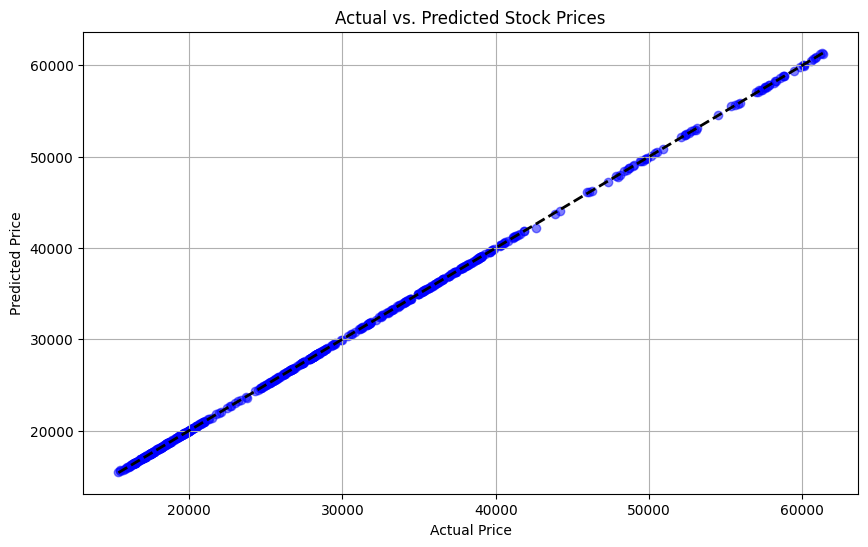

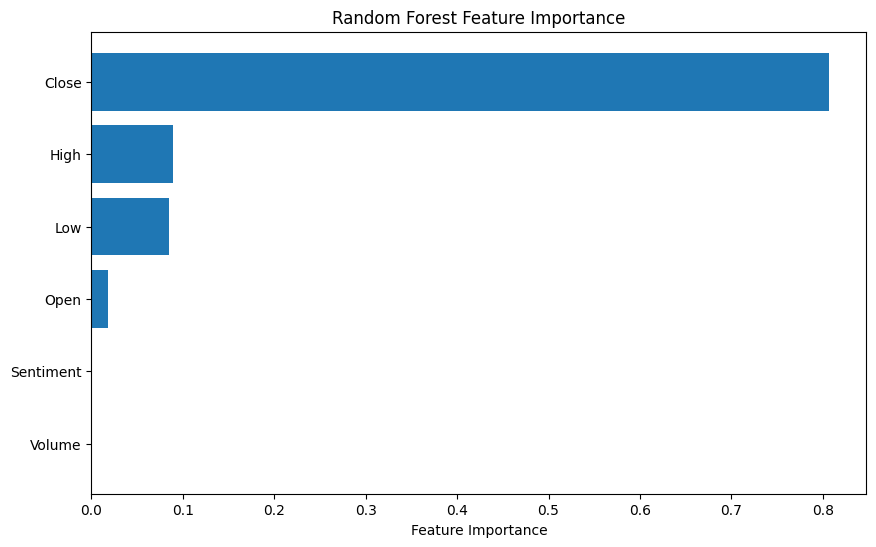

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importances_
feature_names = features.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Print the results
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


Mean MSE: 23955274.77019463
Standard Deviation of MSE: 47858497.1631567


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE and MAE
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print(f'Testing MSE: {mse_test}')
print(f'Testing MAE: {mae_test}')


Testing MSE: 1119.6618518589378
Testing MAE: 15.470295888704404
